<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/03_StatisticsUsingPython/blob/main/02_SamplingAndProbability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics Using Python: Sampling and Probability

In this course, we will discuss more about sampling techniques and probability theory. We will understand what are probability distributions and how to measure a confidence interval. Then, we will get to know some sampling techniques, as well as understand how to evaluate an appropriate sampling size.

In this project, we will use a dataset from PNAD 2015. First, let's import this data using:

In [2]:
import pandas as pd

dataset = pd.read_csv('dados.csv')

dataset.head( )

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In this dataset, we have information regarding:

*   State from Brazil (UF)
*   Sex (Sexo)
*   Age (Idade)
*   Color (Cor)
*   Years of study (Anos de estudo)
*   Monthly income (Renda)
*   Height (Altura)

For some of these, our data is encoded. The code can be seen in the following:


**State from Brazil:**

In [3]:
map_state = {11: "Rondônia",
             12: "Acre",
             13: "Amazonas",
             14: "Roraima",
             15: "Pará",
             16: "Amapá",
             17: "Tocantins",
             21: "Maranhão",
             22: "Piauí",
             23: "Ceará",
             24: "Rio Grande do Norte",
             25: "Paraíba",
             26: "Pernambuco",
             27: "Alagoas",
             28: "Sergipe",
             29: "Bahia",
             31: "Minas Gerais",
             32: "Espírito Santo",
             33: "Rio de Janeiro",
             35: "São Paulo",
             41: "Paraná",
             42: "Santa Catarina",
             43: "Rio Grande do Sul",
             50: "Mato Grosso do Sul",
             51: "Mato Grosso",
             52: "Goiás",
             53: "Distrito Federal"}

**Sex:**

In [ ]:
map_sex = {0: "M",
           1: "F"}

**Years of study:**

In [ ]:
map_years_study = {1 : "0 years",
                   2 : "1 year",
                   3 : "2 years",
                   4 : "3 years",
                   5 : "4 years",
                   6 : "5 years",
                   7 : "6 years",
                   8 : "7 years",
                   9 : "8 years",
                   10: "9 years",
                   11: "10 years",
                   12: "11 years",
                   13: "12 years",
                   14: "13 years",
                   15: "14 years",
                   16: "15 years",
                   17: "Not found",
                   18: "Not aplicable"}

**Color:**

In [ ]:
map_color = {0: "Indigenous",
             2: "White",
             4: "Black",
             6: "Yellow",
             8: "Pardo",
             9: "Not declared"}

This dataset can be found from IBGE website. However, some data treatment was performed before:


*   Invalid entries for monthly income were eliminated (999 999 999 999).
*   Missing entries for monthly income were eliminated.
*   We considered only data from a person of reference in each house.


# Probability Distributions

When we work with random variables, we usually deal with probability distributions. These distributions define "probabilities of occurrence of different possible outcomes for an experiment". More about Probability Distributions can be found in:

https://en.wikipedia.org/wiki/Probability_distribution

Here, we will take a look at the three most popular PDs: Binominal, Poisson and Normal.

## Binomial distribution

A binomial distribution is characterized by the possibility of only two different outcomes, denominated as Success (1) or Failure (0). For instance, if we toss a coin, and can either be heads or tails. In statistics, probability using the binomial distribution can be evaluated by:

\begin{equation}
P(k)=\left(\begin{array}{l}
n \\
k
\end{array}\right) p^{k} q^{n-k}
\end{equation}
where $p$ is the probability of success, $q = (1 - p)$ is the probability of failure, $n$ is the number of possible outcomes, and $k$ is the number of events with a good outcome (success).


Note that, for the binomial distribution to work, we have some premises:
* All tests are identical.
* All tests are independent.
* There are only two possible outcomes in each test (success or failure).
* All tests have the same $p$ and $q$.

The mean and the standard deviation for the binomial distribution can be evaluated by:

\begin{equation}
\mu = n \, p
\end{equation}

\begin{equation}
\sigma = (n \, p \, q)^{0.5}
\end{equation}

### Example: Binomial distribution



For instance, if a student does not know the answer of an objective problem with 5 items, the probability of success and the probability of failure are:
\begin{equation}
p = \dfrac{1}{5} = 0.20 \quad \text{ and } \quad q = (1 - p) = 0.80
\end{equation}

If there are 10 problems in the test and the student has to choose the correct answer in 7 of them, the probability of passing the test can be evaluated as:

\begin{equation}
P(7)=\left(\begin{array}{l}
10 \\
\, \, 7
\end{array}\right) 0.20^{7} \, 0.80^{3}
\end{equation}

First, let's evaluate the combination, which denote the number of possible outcomes:

In [8]:
from scipy.special import comb
C = comb(10, 7)
C

120.0

Then, lets evaluate the probability:

In [12]:
print(f"The probability is {round(C*(0.20**7)*(0.80**3)*100, 3)}%")

The probability is 0.079%


So, it is very unlikely that the student passes without knowing anything about the test ($P = 0.079\%$). But what if he only needs to hit 5 of the 10 problems, and if there are only 4 options in each problem?

In [14]:
C = comb(10, 5)

print(f"The probability is {round(C*((1/4)**5)*((3/4)**5)*100, 3)}%")

The probability is 5.84%


The probability greatly increases, as it is now easier for the student to pass the test.

Note that the binomial distribution can also be evaluated using the Probability Mass Function (PMF) for the *binom( )* function.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [19]:
from scipy.stats import binom

k = 7
n = 10
p = 0.20

print(f"The probability is {round(binom.pmf(k, n, p)*100, 3)}%")



The probability is 0.079%


Now, we actually made a mistake here: when we consider $k = 7$, we are evaluating the probability of the candidate hitting exactly 7 problems. However, the student also passes if he hits 8, 9 or 10 problems. Thus, the probability of the student passing is actually:

In [20]:
n = 10
p = 0.20

P7  = binom.pmf(7 , n, p)
P8  = binom.pmf(8 , n, p)
P9  = binom.pmf(9 , n, p)
P10 = binom.pmf(10, n, p)

print(f"The probability is {round((P7 + P8 + P9 + P10)*100, 3)}%")

The probability is 0.086%


So, the probability is actually slightly higher. Another option is to pass a list when calling the PMF, and then add the values from the list:

In [21]:
Ps = binom.pmf([7, 8, 9, 10], n, p)
Ps

array([7.86432e-04, 7.37280e-05, 4.09600e-06, 1.02400e-07])

In [22]:
Psum = sum(Ps)

print(f"The probability is {round(Psum*100, 3)}%")

The probability is 0.086%


Great! We returned the same result. However, the best approach is to actually use the Cumulative Distribution Function (CDF):

In [23]:
binom.cdf(6, n, p)

0.9991356416

This function gives the cumulative probability, that is, the probability of the student hitting 0, 1, 2, 3, 4, 5, or 6 problems. Since we want to get the probability of the student hitting 7 or more problems, we simply do:

In [24]:
print(f"The probability is {round((1 - binom.cdf(6, n, p))*100, 3)}%")

The probability is 0.086%


Or we can simply use the Survival Function, which is actually 1 - CDF:

In [27]:
print(f"The probability is {round((binom.sf(6, n, p))*100, 3)}%")

The probability is 0.086%


Great! Everything worked out.

Now, what is the average number of problems this student will do? We can use the equation for the mean of the binomial distribution:

In [32]:
n = 10
p = 0.20

mean_bin = n*p
mean_bin

2.0

So, on average, the student will hit 2 problems. This result follows the intuition. 

And what is the standard deviation?

In [34]:
q = 1 - p

std_bin = (n*p*q)**0.5
std_bin

1.2649110640673518

## Poisson distribution

The Poisson distribution is used to find the **number of occurrences** in a time interval. The events are evaluated by counting the successes in this interval. The Poisson distribution is a discrete probability distribution. The Poisson distribution can be evalauted by:

\begin{equation}
P(k)=\frac{e^{-\mu}(\mu)^{k}}{k !}
\end{equation}
where $e$ is the Euler's constant, $\mu$ is the mean number of occurrences in a given time interval, and $k$ is the number of successes.



Note that, for the Poisson distribution to work, we have some premises:
* Probability of occurrence is the same in the entire interval.
* Number of occurrences in a given interval is independent of the number of occurrences in other interval.
* Probability of occurrence is the same in intervals of the same size.

The mean and the standard deviation for the Poisson distribution can be evaluated by:

\begin{equation}
\mu = \mu
\end{equation}

\begin{equation}
\sigma = \mu^{0.5}
\end{equation}

Note that $\mu$ is a parameter for the Poisson distribution, and has to be evaluated beforehand.

### Example: Poisson distribution

Let's say that our restaurant receives, on average, 20 orders per hour. What is the probability that our restaurant gets 15 orders in a given hour?

In [39]:
import numpy as np

euler_num = np.e
euler_num

2.718281828459045

In [44]:
mu = 20
k = 15

P = (euler_num**(-mu))*(mu**k)/np.math.factorial(k)
print(f"The probability is {round(P*100, 3)}%")

The probability is 5.165%


Using scipy, we can also simply use:

In [45]:
from scipy.stats import poisson

P = poisson.pmf(k, mu)

In [46]:
print(f"The probability is {round(P*100, 3)}%")

The probability is 5.165%


Great! We got the same result.

## Normal distribution

The Normal Distribution is one of the most popular DFs in statistics. This is a continuous distribution function where the frequency distribution is given by a bell-shaped function. This function is symmetric, and the central value is the mean (and also the mode and the median). More about the Normal distribution can be found in:

https://en.wikipedia.org/wiki/Normal_distribution



Important characteristics for the Normal distribution:

* The Normal distribution is symmetric.
* The area under the curve is 1 (or 100\%).
* All central tendency measures (mean, median, and mode) are equal.
* Curve extreme values tend to the infinite in both directions (theoretically, they never touch the x-axis).
* When we have a high standard deviation $\sigma$, the bell-shape is larger and flatter.
* The distribution is defined solely by its mean and standard deviation. 
* Since it is a countinuous distribution function, probability is always defined by a lower and upper bound, and probability is defined by the area between these bounds (integral).

The Probability Density Function (PDF) for the Normal distribution is given by:

\begin{equation}
f(x)=\frac{1}{\sqrt{2 \pi \sigma}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}
\end{equation}
where $x$ is the Normal variable, $\sigma$ is the standard deviation, and $\mu$ is the mean.

To get the area under the curve, we can use an integral. However, there are standard tables that can help use to evaluate probabilities. To use these tables, we first standardize our Normal variable by:

\begin{equation}
Z = \frac{x - \mu}{\sigma}
\end{equation}
Note that standardization is also a very common procedure so that our variable unit does not affect our final result. This, it is very important to know how it can be performed.

To get the area to the **left** of a given value, we can use a standardized table, such as:

https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

These tables give the probability for a given $Z$.

### Example: Normal distribution

Using Python, we can get the probability very easily using the *scipy.stats* library.

Let's say that, on average, a person is 1.70 m tall, and the standard deviation is 0.10 m. What is the probability that one measures less than 1.80 m?

Note that, when we ask for less the 1.80 m, we want the area to the left of the Normal curve. Thus, we can simply do:

In [50]:
from scipy.stats import norm

mu_n  = 1.70
std_n = 0.10
x = 1.80
Z = (x - mu_n)/std_n
P = norm.cdf(Z)

print(f"The probability is {round(P*100, 3)}%")

The probability is 84.134%


Now, what if we want to get the probability of one's height being more than 1.60 m and and less than 1.80 m?

In this case, we can simply subtract the probability of being less than 1.60 m from the probability of being less than 1.80 m.

In [58]:
mu_n  = 1.70
std_n = 0.10
x1 = 1.80
Z1 = (x1 - mu_n)/std_n
P1 = norm.cdf(Z1)

x2 = 1.60
Z2 = (x2 - mu_n)/std_n
P2 = norm.cdf(Z2)

P = P1 - P2
print(f"The probability is {round(P*100, 3)}%")

The probability is 68.269%


And how do we get the probability of a person being **more** than 1.90 m? We can simply do 100\% (or 1) minus the probability of being less than 1.90 m.

In [59]:
mu_n  = 1.70
std_n = 0.10
x = 1.90
Z = (x - mu_n)/std_n
P1 = norm.cdf(Z)

P = 1 - P1
print(f"The probability is {round(P*100, 3)}%")

The probability is 2.275%


# Sampling techniques

In statistics, we rarely have data for an entire population. Thus, we usually deal with samples from this population. Here, we have some very important concepts:

* Population: Entire set of elements of interest in a given study. A population can be finite (when we can count those elements) or infinite (when we can not count).
* Sample: A representative set of the population. To use a sample, we have to understand if this sample is representative of the entire population, which means that it should be **large enough** and also **keep the most important properties and proportions from the population itself**.

And when should we use a sample of our population?

* When we have an infinite population (or a very large finite population).
* When our tests destroy our element (destructive tests).
* When we want to get faster results.
* When our tests are very costly.



## Simple Random Sampling

Simple Random Sampling (SRS) is one of the most popular (if not the most popular) sampling technique. Here, all elements from the population have the same probability to be selected. As the number of sampling points grows, the sample better represents the population.

Let's see how we can do a SRS from our dataset using Pandas.

Our dataset has 76840 observations

In [85]:
dataset.shape[0]

76840

Let's assume that our dataset represents our population. If we take the mean monthly income of our population, we have:

In [86]:
mean_pop = dataset.Renda.mean( )
mean_pop

2000.3831988547631

Let's say we want to make a sample with only 100 observations. We can do:

In [87]:
SEED = 101

sample_1 = dataset.sample(100, random_state = 101)

Here, the random_state parameter simply passes a random seed, so that, everytime we run a code, we get the same result.

Now, let's evaluate the average monthly income from our sample:

In [88]:
mean_smp1 = sample_1.Renda.mean( )
mean_smp1

2150.85

Note that the mean of our sample is 2150.85, which differs from the mean population. We can evaluate the error using:

In [89]:
(mean_smp1 - mean_pop)/mean_pop

0.0752189886574634

So, our error is 7.5%. Let's try again using a sample with 1,000 observations:

In [90]:
sample_2 = dataset.sample(1000, random_state = 201)
mean_smp2 = sample_2.Renda.mean( )
mean_smp2

2018.311

In [91]:
(mean_smp2 - mean_pop)/mean_pop

0.008962183423406387

Now, our error is only 0.8%. Note that our sample is now a much better representation of our population.

Now, let's check the proportion of men and women in our dataset. On our population, this proportion is:

In [93]:
dataset.Sexo.value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

Then, if we do the same on our sample of 100 observations:

In [94]:
sample_1.Sexo.value_counts(normalize = True)

0    0.69
1    0.31
Name: Sexo, dtype: float64

Actually, this sample seems to represent very well our population.

Thus, it is hard to define, by trial and error, an adequate (and representative) size of our sample. Is there any statistical measure that can better define an adequate sample size for our analysis?

Before going further into this topic, let's see two other sampling techniques.

## Stratified Sampling

It is an improvement over the process where, first, we separe the population in homogeneous groups and, inside these homogeneous groups, we make a SRS.

For instance, if our population has 2% of people with a given religion. In our sample, we have to ensure that this part of our population is represented in our sample. Thus, we first stratify our population, and then sample on these subgroups.

This idea can also be performed for classes of income, color, gender, and others.

## Cluster Sampling

Similar to the stratified sampling, cluster sampling also first divides the sample in different groups. However, here, these groups are mostly heterogeneous. Inside these groups, one can then apply a stratified sampling, for instance.

An example is when we first divide our population in different states, where our sample is still very heterogeneous, and then apply a stratified sampling.

# Confidence level and intervals of confidence

When we work with samples from a population, we will **never** be able to know the mean of the population with certainty. Using samples, the best thing to do is to have an **interval of confidence** for the mean (or any another measure), which is associated to a confidence level. The higher the confidence level, the higher the interval. The lower the sample size, the higher the interval.

So, considering a given confidence level, we can make educated guesses over the population parameters using information from the sample. Here, we have to different concepts:


*   Parameters are defined by the population, such as the mean ($\mu$) and the standard deviation ($\sigma$).
*   Estimates are evaluated using the sample, such as the sample mean ($\overline{x}$) and the sample standard deviation ($s$).



## Central Limit Theorem

The Central Limit Theorem (CLT) states that, when we increase the sample size, the distribution of sample means becomes very close to a normal distribution (bell-shaped). This normal distribution has mean equals to the population mean and standard deviation equals to:

\begin{equation}
\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}
\end{equation}
which is known as the standard error of the mean.

Let's try to understand more about the CLT.

The CLT states that the **distribution of sample means** follows a normal bell-shaped curve. How can we get this distribution?

Previously, we have taken a sample from our population. Now, let's do something more: let's take 1500 samples from our population, each sample containing 1000 random observations:

In [95]:
n = 1000
total_samp = 1500

In [96]:
samples = pd.DataFrame( )

In [97]:
for i in range(total_samp):
  _ = dataset.Idade.sample(n)
  _.index = range(0, len(_))
  samples['Sample_'+str(i+1)] = _

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [99]:
samples.shape

(1000, 1500)

Ok, we have created 1500 sample, each containing 1000 observations.

Now, let's get the mean of each sample:

In [100]:
samples.mean( )

Sample_1       44.435
Sample_2       44.110
Sample_3       43.984
Sample_4       43.462
Sample_5       44.333
                ...  
Sample_1496    43.862
Sample_1497    44.247
Sample_1498    43.857
Sample_1499    43.860
Sample_1500    44.308
Length: 1500, dtype: float64

So, as the samples grow, the distribution of sample means is close to a Normal distribution. Let's see an histogram for our sample means:

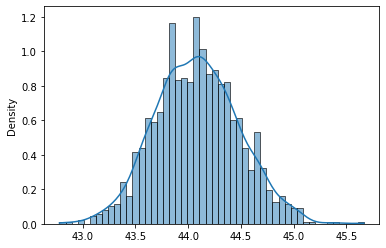

In [112]:
import seaborn as sns

sns.histplot(x = samples.mean( ), stat = 'density', bins = 50, kde = True)

So, our distribution is close to a bell-shape. We could still improve this by increasing the number of samples or increasing the number of observations in each sample. Let's see the mean of this distribution:

In [116]:
samples.mean( ).mean( )

44.08447266666667

While our population mean is:

In [117]:
dataset.Idade.mean( )

44.07142113482561

Indeed, the mean of our sample means is very close to our population mean!

Let's now try to estimate the population standard deviation from the sampled means. We now that:

\begin{equation}
\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}
\end{equation}

Thus, we can do:

In [118]:
samples.mean( ).std( )*np.sqrt(n)

12.459601158420224

In [119]:
dataset.Idade.std( )

12.480583465360187

Again, this is a very close estimate for the population standard deviation!

## Confidence and significance levels

The confidence level ($1 - \alpha$) represents the probability of being right about an estimate. Here, $\alpha$ is the significance level, which expresses the probability of being wrong.

Usually, we consider a confidence level of 95% in our analysis as a standard. That means that there is a chance of 95% that our estimate is correct.

The confidence level can be found by the area under a normal curve. More about the confidence level can be found in:

https://en.wikipedia.org/wiki/Confidence_interval



In that sense, the inference error (margin of error) is determined by the standard deviation of sample means and by the confidence level defined, which is here related to $z$:

\begin{equation}
e = z \, \sigma_{\bar{x}}= z \, \frac{\sigma}{\sqrt{n}}
\end{equation}

Thus, the confidence interval for the population mean is:

\begin{equation}
\mu = \bar{x} \pm e =  \bar{x} \pm z \, \frac{\sigma}{\sqrt{n}}
\end{equation}


Usually, we don't know the population standard deviation. Then, we can use the sample standard deviation as an estimate for it:

\begin{equation}
\mu = \bar{x} \pm z \, \frac{s}{\sqrt{n}}
\end{equation}



### Example: Confidence level

Let's say that a company takes 20 of their products, weights them, and checks that the mean and the standard deviation of the weight are 5,050 g and 150 g, respectively. 

Let's build a confidence interval considering a significance level of 5% (which means that our confidence level is 95%).

In [131]:
samp_mean = 5050
samp_std  = 150
n_s = 20

sig  = 0.05
conf = 1 - sig

To get the z-score, we can use:

In [124]:
z = norm.ppf(1 - sig/2)
z

1.959963984540054

Ok, but why $1 - \alpha/2$?

Our confidence interval will have an upper and a lower bound. Thus, our confidence interval will go from the probability 2.5% to 97.5%. Thus, the probability between these bounds is 95% (confidence level). Thus, to get the right $z$ score, we have to use $1 - \alpha/2$. 

The most popular confidence intervals and their respective $z$-scores are:

In [128]:
# Confidence level: 90%

z_90 = norm.ppf(1 - 0.05)
round(z_90, 3)

1.645

In [129]:
# Confidence level: 95%

z_95 = norm.ppf(1 - 0.025)
round(z_95, 3)

1.96

In [130]:
# Confidence level: 99%

z_99 = norm.ppf(1 - 0.005)
round(z_99, 3)

2.576

Finally, since we got to have a confidence level of 95%, we can do:

In [135]:
z = norm.ppf(1 - sig/2)

e = z*samp_std/np.sqrt(n_s)
mean_lb = samp_mean - e
mean_ub = samp_mean + e

confidence_interval = (mean_lb, mean_ub)

print(f'{confidence_interval[0].round(2)} < pop. mean < {confidence_interval[1].round(2)}')

4984.26 < pop. mean < 5115.74


So, we can assure, with 95% of confidence, that our population mean is between 4984.26 g and 5115.74 g

Instead, using scipy, we can simply do:

In [141]:
sig = samp_std/np.sqrt(n_s)
confidence_interval = norm.interval(alpha = 0.95, loc = samp_mean, scale = sig)

print(f'{confidence_interval[0].round(2)} < pop. mean < {confidence_interval[1].round(2)}')

4984.26 < pop. mean < 5115.74


Nice! The results found were the same. Thus, using scipy, we have a very easy way of evaluating a confidence interval!

# Sample size 

So, how to we define an adequate sample size? It depends on how much we want to be exposed to errors (margin of error).

We saw that the margin of error is given by:

\begin{equation}
e=z \frac{\sigma}{\sqrt{n}}
\end{equation}
Note that, as we increase $n$, we lower our margin of error. Thus, knowing the standard deviation (or at least an estimate for it) and the required margin of error, we can find an adequate sample size ($n$):

\begin{equation}
n=\left(z \frac{s}{e}\right)^{2}
\end{equation}

**Note that these equations serve for an infinite population.**

## Example: Determination of sample size

Let's say that we want to estimate the average monthly income in Brazil. We know that the standard deviation is R\$ 3,323.39, and we want the maximum error (with relation to the mean) to be R\$ 100.00. We also want a confidence level of 95%. 

To solve this, we can do:

In [147]:
z = norm.ppf(0.975)
s = 3323.39
e = 100

n = (z*s/e)**2
np.ceil(n)



4243.0

Thus, we need ate least 4243 sampling points (rounded up).

## What about a finite population?

When we have a finite population, we need to include a correction factor in our equation:

\begin{equation}
n=\frac{z^{2} \sigma^{2} N}{z^{2} \sigma^{2}+e^{2}(N-1)}
\end{equation}
or, when we don't know the population standard deviation:
\begin{equation}
n=\frac{z^{2} s^{2} N}{z^{2} s^{2}+e^{2}(N-1)}
\end{equation}
where $N$ is the population size.

For instance, let's say that we are trying to analyze an specific batch of products from our soda company. The batch has 10,000 cans of soda, and we make a simple random sampling, taking 100 observations (amount of soda in each can). The standard deviation is 12 ml, and the maximum error from the mean allowed is 5 ml. Let's evaluate the required sample size which guarantees a confidence level of 95%.

In [155]:
N = 10000
n = 100
s = 12
e = 5
sig = 0.05

z = norm.ppf(1 - sig/2)
n = (z*z*s*s*N)/((z*z*s*s) + (e*e*(N - 1)))
np.ceil(n)

23.0

So, to get a margin of error of 5 ml with a confidence level of 95% we need at least 23 cans of soda. Let's see how much cans of soda would be necessary if we considered our population to be infinite:

In [153]:
n = (z*s/e)**2
np.ceil(n)

23.0

Also 23. In fact, as $N$ increases, the value found for a finite population tends to the value found for an infinite population. Since our finite population is very large (10,000), the difference is very minor.

# Applications

In this section, we will apply what we learned here in analyses using our dataset from PNAD 2015.

**First, let's get information about the monthly income. Let's say that we want to get the average monthly income for those with monthly income lower than 5000. We know that the standard deviation is R\$ 1,082.79, and the maximum error in relation to the mean is considered to be R\$ 10.00. Considering that we want a confidence level of 95\%, how many sampling points do we need?**

Considering that our population is infinite, the number of sampling points required is:

\begin{equation}
n = \left( \dfrac{z \, \sigma}{e} \right)^2
\end{equation}

Thus, we can do:

In [162]:
sigma = 1082.79
e = 10
cnf_lvl = 0.95

sig_level = 1 - cnf_lvl
z = norm.ppf(1 - sig_level/2)

n = (z*sigma/e)**2
print(f'The number of samples required is {int(np.ceil(n))}')

The number of samples required is 45039


So, we need 45039 samples to get such a margin of error.

**Now, let's consider that, using such a number of samples, we find that the mean is R\$ 1,426.53. We can evaluate the confidence interval by:**

In [165]:
income_mean = 1426.53

interv = norm.interval(alpha = 0.95, loc = income_mean, scale = sigma/np.sqrt(n))
interv

(1416.53, 1436.53)

Indeed, note that the lower bound is the same as the mean minus and plus 10!

Let's try to visualize the confidence interval. Here, we will get the mean of 1000 simulations, and we will show that, in most cases (close to 95\%) this mean is inside our confidence interval.

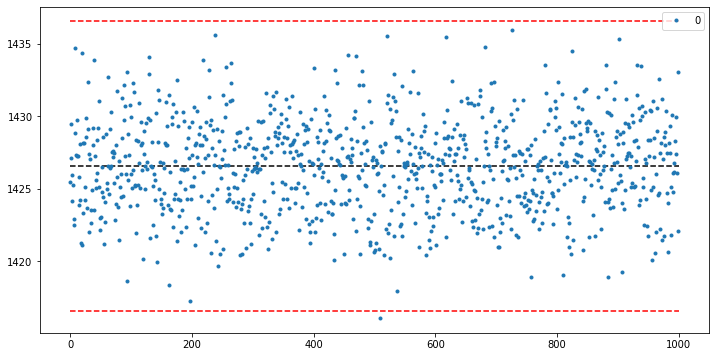

In [177]:
import matplotlib.pyplot as plt

num_sims = 1000

income_5000 = dataset.query('Renda <= 5000')['Renda']

means = [income_5000.sample(int(np.ceil(n)), random_state = (400 + i)).mean( ) for i in range(num_sims)]

means = pd.DataFrame(means)

ax = means.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = income_mean, xmin = 0, xmax = num_sims, colors = 'black', linestyles = 'dashed')
ax.hlines(y = interv[0], xmin = 0, xmax = num_sims, colors = 'r', linestyles = 'dashed')
ax.hlines(y = interv[1], xmin = 0, xmax = num_sims, colors = 'r', linestyles = 'dashed')

Note that, indeed, from the 1,000 means evaluated, a very low number was not in the bounds delimited by the confidence interval.

**Most entries of our dataset (70\%) have 'Sex = 0', referred to men. We need to randomly select groups of 10 people to verify differences in their income. What is the probability of selecting a group with 7 men and 3 women?**

The real proportion between men and women in our dataset is:

In [180]:
rel_freq = dataset.Sexo.value_counts( normalize = True )
rel_freq

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

Now, let's evaluate the probability of selecting 7 men and 3 women:

In [182]:
p = rel_freq[0]
q = 1 - p
n = 10
k = 7
P = binom.pmf(k, n, p)
P

0.2665193783299737

So, the probability of selecting a group with exactly 7 men and 3 women is 26.65%.

**How many groups should we select to get, on average, 100 groups made of 7 men and 3 women?**

The average of the binomial distribution is given by:

\begin{equation}
\mu = n \, p
\end{equation}

Since the probability of finding one group with 7 men and 3 women is 26.65%, we can do:

In [184]:
100.0/P

375.20723868788065

So, we need, on average, 375 groups of 100 individuals so that, on average, we have 100 groups with 7 men and 3 women.

**We have to do a new research about the monthly income of Brazilian people. To do so, we have R\$ 150,000.00 at our disposal, and the average cost per person interviewed is R$ 100.00. We would like to get a margin of error of less than 10\% with respect to the estimated mean. Preferrably, we would like a confidence level of 95\%**.

 * First, let's make an estimate of the population parameters. For that end, we will make a random sampling with only 200 observations:

In [188]:
sample_200 = dataset.Renda.sample(200, random_state = 101)

est_mean = sample_200.mean( )
est_std  = sample_200.std( )
print(f"Mean: {round(est_mean, 2)}")
print(f"Std: {round(est_std, 2)} ")


Mean: 1964.2
Std: 3139.89 


* Using our estimates, let's get the sample size necessary for a confidence level of 90\%, 95\%, and 99\%. For that end, we will consider that our population is infinite.

In [191]:
sigma = est_std
e = 0.10*est_mean

z_90 = norm.ppf(0.95)
z_95 = norm.ppf(0.975)
z_99 = norm.ppf(0.995)

n_90 = int(np.ceil((z_90*sigma/e)**2))
n_95 = int(np.ceil((z_95*sigma/e)**2))
n_99 = int(np.ceil((z_99*sigma/e)**2))

print(f"For a confidence level of 90%, we need {n_90} samples.")
print(f"For a confidence level of 95%, we need {n_95} samples.")
print(f"For a confidence level of 99%, we need {n_99} samples.")

For a confidence level of 90%, we need 692 samples.
For a confidence level of 95%, we need 982 samples.
For a confidence level of 99%, we need 1696 samples.


* Now, let's evaluate the cost of the research for each confidence level. We need to remember that we only have R\$ 150,000.00 at our disposal.

In [195]:
print("For a confidence level of 90%, the cost of the research is R$ {:,.2f}." .format(n_90*100))
print("For a confidence level of 95%, the cost of the research is R$ {:,.2f}." .format(n_95*100))
print("For a confidence level of 99%, the cost of the research is R$ {:,.2f}." .format(n_99*100))

For a confidence level of 90%, the cost of the research is R$ 69,200.00.
For a confidence level of 95%, the cost of the research is R$ 98,200.00.
For a confidence level of 99%, the cost of the research is R$ 169,600.00.


So, the highest confidence level that is inside our budget is 95\%.

* Assuming the confidence level of 95\%, we can now evaluate the confidence interval for the population mean.

In [198]:
n = 982
sample_982 = dataset.Renda.sample(n, random_state = 101)

est_mean_982 = sample_982.mean( )
est_std_982  = sample_982.std( )

sigma_982 = est_std_982/np.sqrt(n)

interv = norm.interval(0.95, loc = est_mean_982, scale = sigma_982)
interv

(1804.949081269165, 2195.2892079365374)

So, considering a 95\% confidence interval, the population mean is inside these bounds:

\begin{equation}
1804.95 < \mu < 2195.29
\end{equation}

* Note that we spent less than the total budget, and our margin of error was of R\$ 195.17. What is the margin of error if we spend the entire budget at our disposal?

In [201]:
max_cost = 150000
cost_per_interview = 100

num_max = max_cost/cost_per_interview
num_max

1500.0

So, we can do 1500 interviews. We can evaluate the error using:

In [202]:
z = norm.ppf(0.975)

e = z*(est_std/np.sqrt(num_max))
e

158.89721122673737

So, using the entire budget, our new margin of error is of R\$ 158.89.

* Assuming a confidence level of 95%, how much would the research cost if we want a margin of error of only 5% (in relation to the mean)?

In [205]:
z = norm.ppf(0.975)
e = est_mean*0.05

n = int(np.ceil((z*est_std/e)**2))
n

3927

So, we would need 3927 observations...

In [206]:
n*100

392700

which would cost R\$ 392,700.00!